## HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/train.csv')
df.shape

(1460, 81)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data exploration on the data

'SalePrice' is our dependent feature and all other feature are independent. 
Let's first try to know more about our predictor feature

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

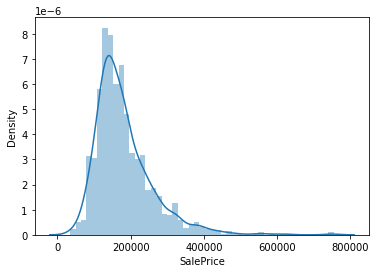

In [6]:
#histogram
sns.distplot(df['SalePrice'])

We observe that the data is left-skewed

In [7]:
#checking skewness adn kurtosis

print("Skewness = ", df['SalePrice'].skew())
print("Kurtosis = ", df['SalePrice'].kurt())

Skewness =  1.8828757597682129
Kurtosis =  6.536281860064529


#### Checking Correlation

<AxesSubplot:>

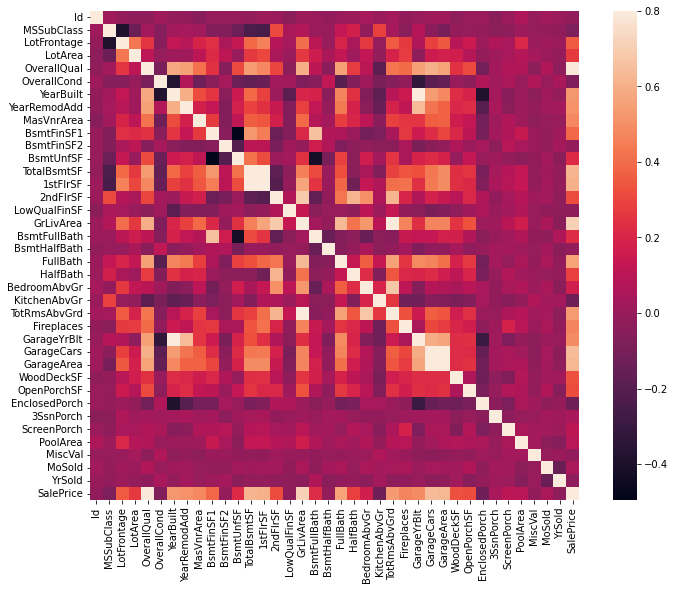

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),vmax=.8, square =True)


Some points to be taken from the correlation heatmap:

 - Some features are highly correlated to each other(eg. 'TotalBsmtSF' and '1stFlrSF'). This shows indeication of multicollinearity.
 - Some of the features which have high correlation to 'SalePrice'.

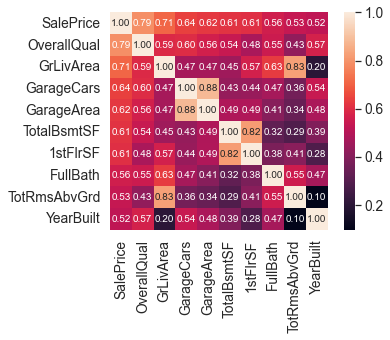

In [9]:
#salesprice correlation matrix
#lets see the top 10 features that are highly correlated to 'SalePrice'

corrmat = df.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale= 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                      yticklabels=cols.values, xticklabels=cols.values)

plt.show()

- We can observe that 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correalted to 'SalePrice'.
- Some of the feature that can be treated as same are ('GarageCars' and 'GarageArea'), ('TotalBsmtSF' and '1stFlrSF') and ('TotRmsAbvGrd' and 'GrLivArea')
- Also 'YearBuilt' is slightly related to 'SalePrice'

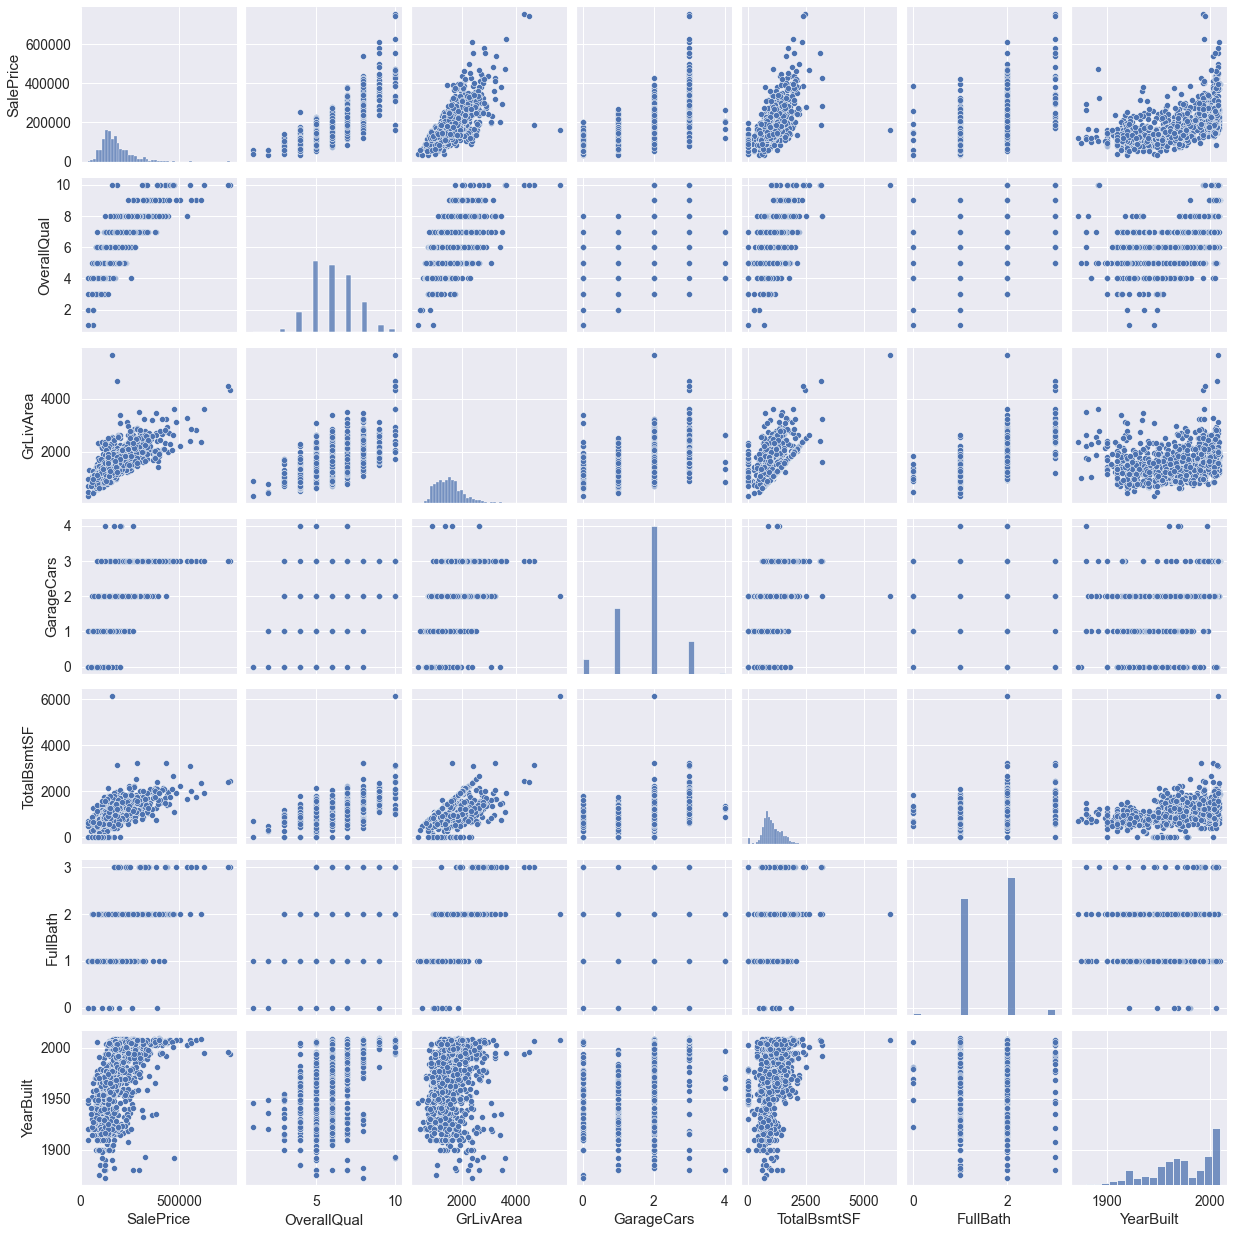

In [10]:
# visualize using pairplots
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)


Realtionship with some numerical features

(0.0, 800000.0)

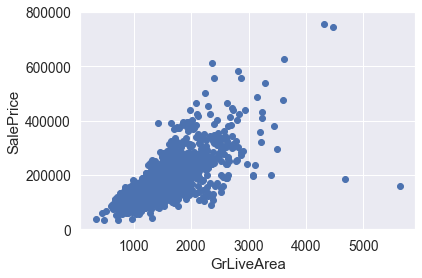

In [11]:
# SalePrice vs GrLivArea

plt.scatter(x= 'GrLivArea', y= 'SalePrice', data=df )
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)

(0.0, 800000.0)

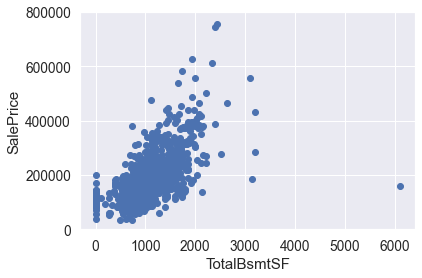

In [12]:
# SalePrice vs TotalBsmtSF

plt.scatter(x= 'TotalBsmtSF', y= 'SalePrice', data=df )
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)

Relationship with Categorical Feature

(0.0, 800000.0)

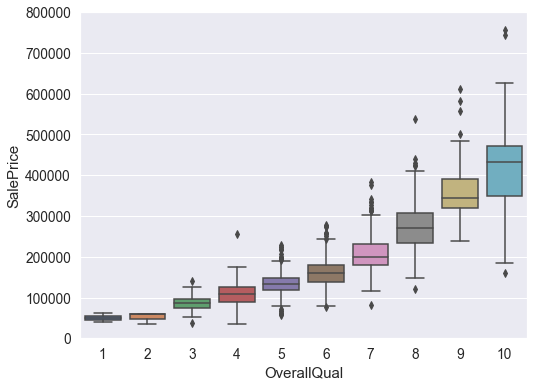

In [13]:
# SalePrice vs OverallQual

plt.figure(figsize=(8,6))
sns.boxplot(x= 'OverallQual', y= 'SalePrice', data=df )
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)

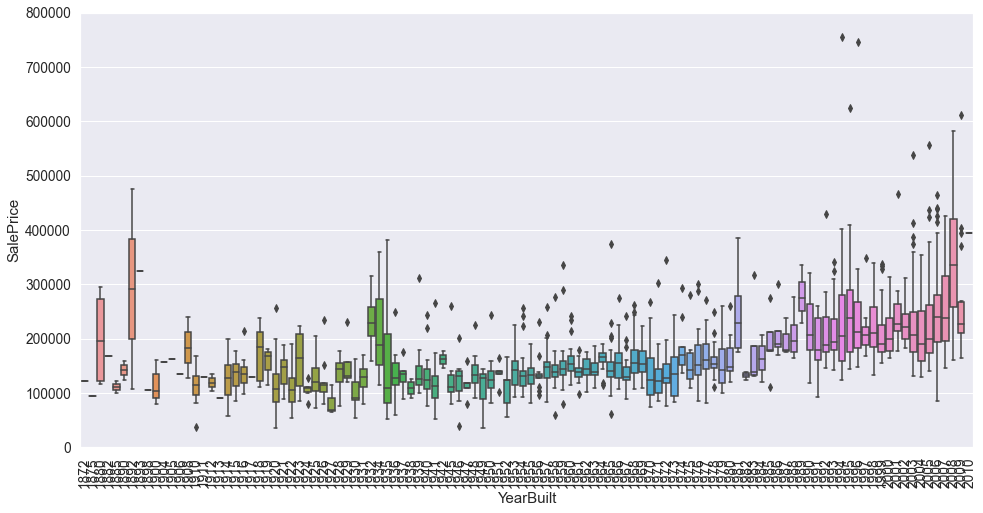

In [14]:
# SalePrice vs yearBulit

plt.figure(figsize=(16,8))
sns.boxplot(x= 'YearBuilt', y= 'SalePrice', data=df )
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)
plt.xticks(rotation = 90)
plt.show()

### Handling missing data and cleaning data

In [15]:
#missing data

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis= 1, keys = ['Total', 'Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


We can observe that some features have more than 90% of data missing. We will delete those features. Infact, we will delete any feature which has more than 15% of data missing. 

In [16]:
#handling the missing data
df = df.drop((missing[missing['Total'] > 1]).index,axis= 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #checking if any missing is left

0

#### Handling Outliers

(0.0, 800000.0)

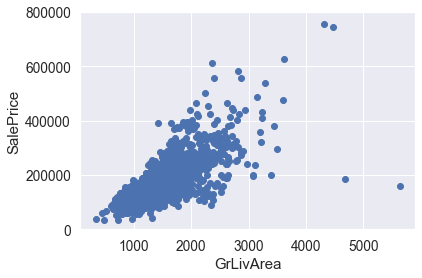

In [17]:

# SalePrice vs GrLivArea

plt.scatter(x= 'GrLivArea', y= 'SalePrice', data=df )
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)

We can observe 2 values at left corner that we need to deal with.

In [18]:
#delete the points
df.sort_values(by= 'GrLivArea', ascending=False)[:2]
# we know the outliers ID 1299 and 524

df = df.drop(df[df['Id']== 1299].index)
df = df.drop(df[df['Id']== 524].index)

(0.0, 800000.0)

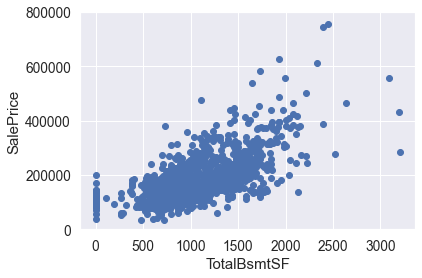

In [19]:
#Outliers in TotalBsmtSF

# SalePrice vs TotalBsmtSF
plt.scatter(x= 'TotalBsmtSF', y= 'SalePrice', data=df )
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.ylim(0, 800000)

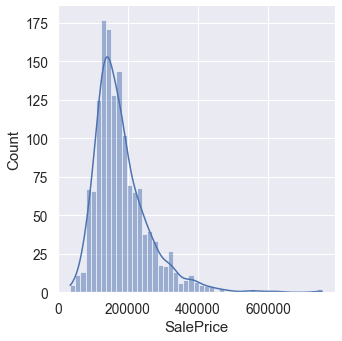

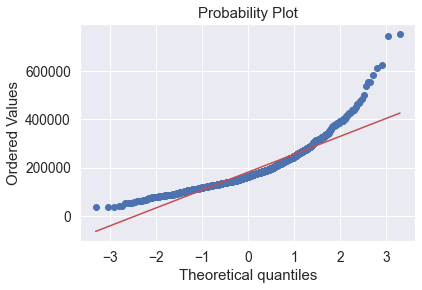

In [20]:
# seeking normality in SalePrice. Removing Skewness

#Histogrm and normal probabilty plot

from scipy.stats import norm
from scipy import stats

sns.displot(df['SalePrice'], kde= True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

We can observe the SalePrice is not normal. It is positive/left skewed and plot doesnt follow straight line.
In case of positive skewness, log transformation works perfectly.

In [21]:
#applying log transformation

df['SalePrice'] = np.log(df['SalePrice'])
df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

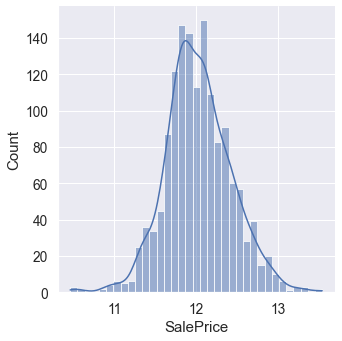

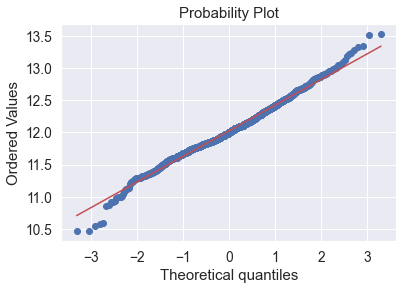

In [22]:
#Histogrm and normal probabilty plot

sns.displot(df['SalePrice'], kde= True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

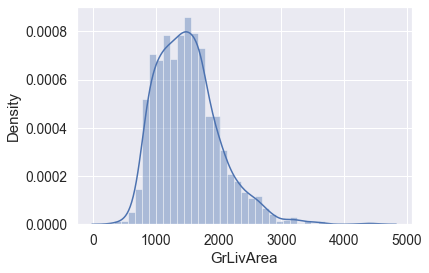

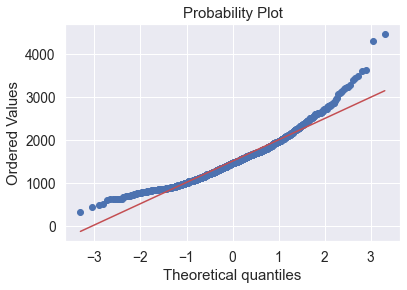

In [23]:
# seeking normality in GrLivArea

#histogram and normal probability plot
sns.distplot(df['GrLivArea'], kde= True);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [24]:
#applying log transformation

df['GrLivArea'] = np.log(df['GrLivArea'])

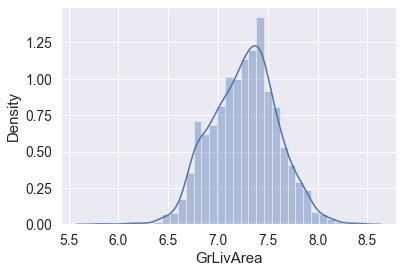

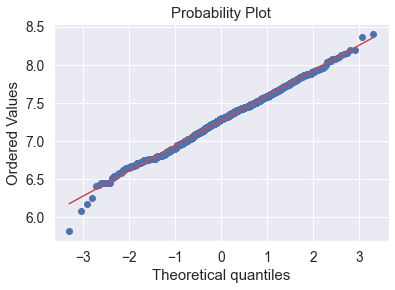

In [25]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], kde= True);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

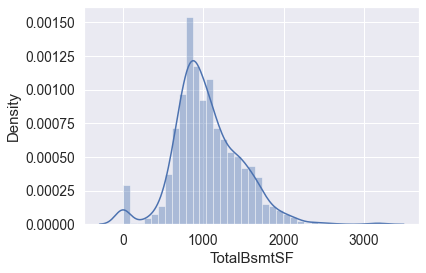

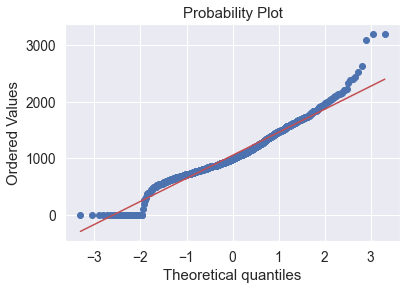

In [26]:
# seeking normality in TotalBsmtSF

#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], kde= True);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

Here, we face some problem as some observations are 0. In that cases we cant apply log transformation.
What we can do is create a new column if data has basement or not. And then we can apply log if there is basement.

In [27]:
#creating new col
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0
df.loc[df['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [28]:
#log transformation
df.loc[df['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

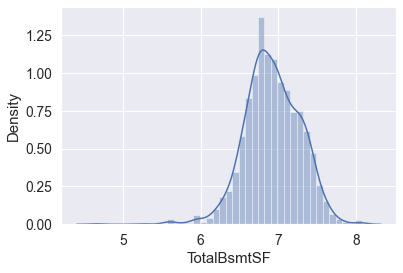

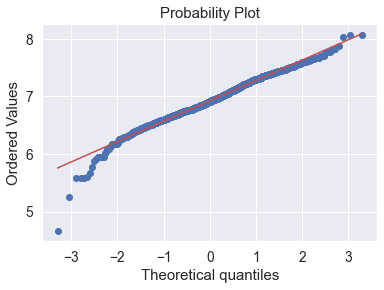

In [29]:
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF'] > 0]['TotalBsmtSF'], kde= True);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

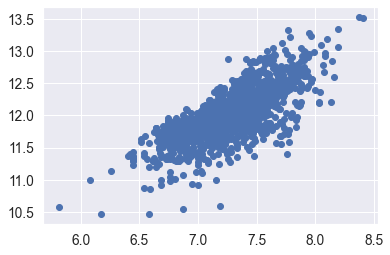

In [30]:
#lets view SalePrice vs GrLivArea after Normality

plt.scatter(df['GrLivArea'], df.SalePrice)

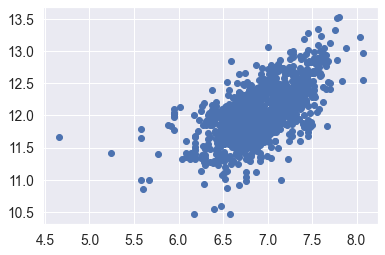

In [31]:
#lets view SalePrice vs TotalBsmt after Normality

plt.scatter(df[df['TotalBsmtSF'] > 0]['TotalBsmtSF'], df[df['TotalBsmtSF'] > 0]['SalePrice'])

#### Dealing with Categorical Features

In [32]:
df = pd.get_dummies(df)
df.shape

(1457, 222)

In [34]:
list(df.columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HasBsmt',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Bl

#### Creating Predictor Model

In [47]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [44]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

print(X.shape)
print(Y.shape)

(1457, 221)
(1457,)


In [45]:
#train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1165, 221)
(292, 221)
(1165,)
(292,)


In [46]:
#Hyperparameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]
base_score = [0.25, 0.50, 0.75, 1]

#Define Grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

In [50]:
regressor = xgboost.XGBRegressor()

#Set up random search with 4-fold CV

random_cv = RandomizedSearchCV(estimator=regressor,
                              param_distributions=hyperparameter_grid,
                              cv = 5,
                              n_iter=50,
                              scoring= 'neg_mean_absolute_error',
                              n_jobs=4,
                              verbose=5,
                              return_train_score=True,
                              random_state=42)

In [51]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [53]:
print(random_cv.best_estimator_)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [55]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)

In [56]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
y_pred = regressor.predict(X_test)

In [70]:
import math
from sklearn.metrics import mean_squared_error, r2_score

rmse = math.sqrt(mean_squared_error(Y_test, y_pred))

rmse

0.11709009755773463

In [71]:
r2 = r2_score(Y_test, y_pred)

r2

0.9209853197549971